In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
size = np.loadtxt("data/size.dat", delimiter=",")
mcs = np.loadtxt("data/mcs.dat", delimiter=",")
configs = np.loadtxt("data/configs.dat", delimiter=",")


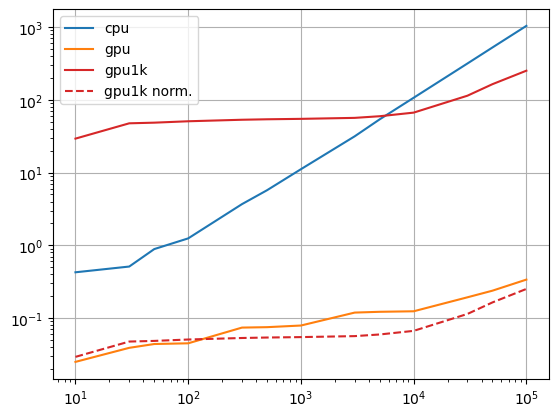

In [3]:
plt.plot(size[:, 0], size[:, 1], label="cpu")
plt.plot(size[:, 0], size[:, 2], label="gpu")
plt.plot(size[:, 0], size[:, 3], label="gpu1k", color='#d62728')
plt.plot(size[:, 0], size[:, 3]/1000, label="gpu1k norm.", linestyle="dashed", color='#d62728')

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

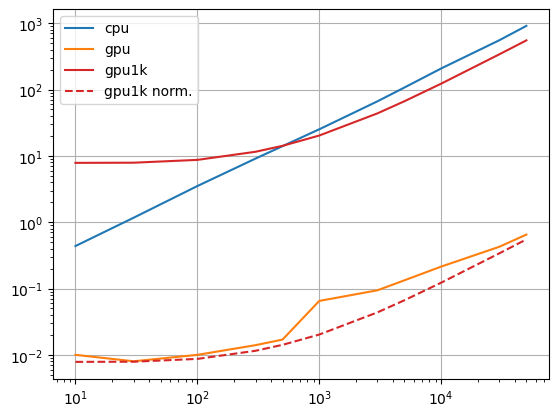

In [4]:
plt.plot(mcs[:, 0], mcs[:, 1], label="cpu")
plt.plot(mcs[:, 0], mcs[:, 2], label="gpu")
plt.plot(mcs[:, 0], mcs[:, 3], label="gpu1k", color='#d62728')
plt.plot(mcs[:, 0], mcs[:, 3]/1000, label="gpu1k norm.", linestyle="dashed", color='#d62728')

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

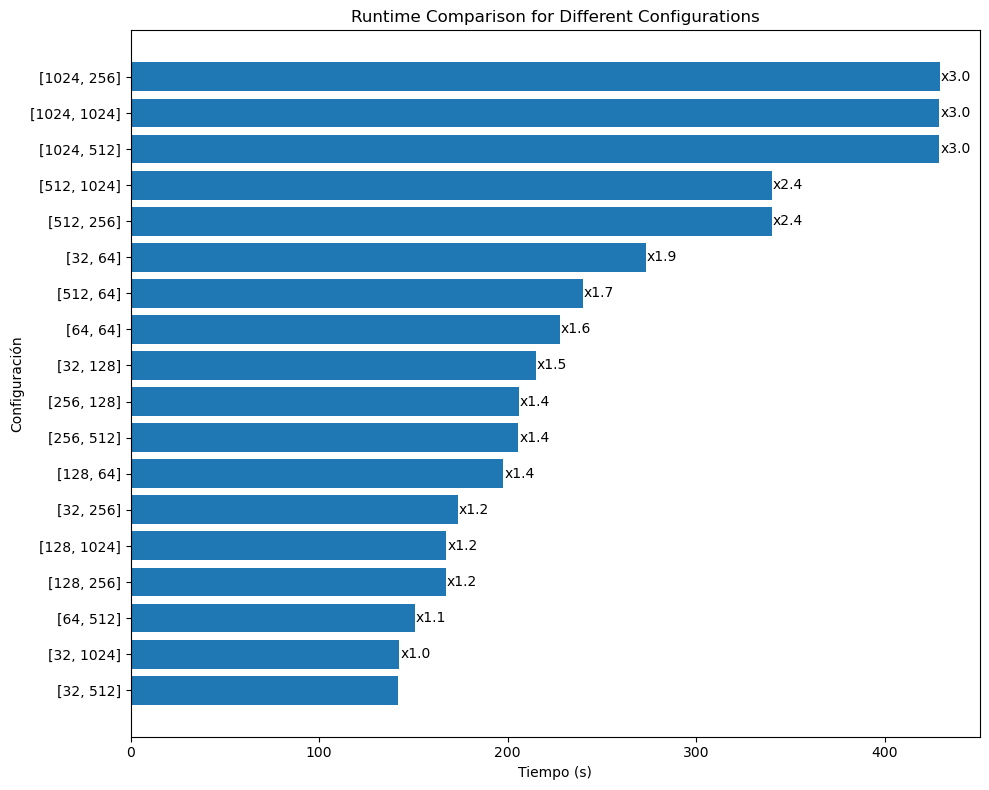

In [5]:
# Configuration and runtime data
indices = list(range(6)) + [8, 10, 12, 14, 16, 18, 20, 22, 24] + list(range(27, 30))
configurations = [[int(configs[i, 0]), int(configs[i, 1])] for i in indices]
runtimes = configs[indices, 3] 

# Sort configurations and runtimes in ascending order of runtimes
sorted_indices = np.argsort(runtimes)
sorted_configurations = [configurations[i] for i in sorted_indices]
sorted_runtimes = [runtimes[i] for i in sorted_indices]

# Calculate the relative speed compared to the fastest configuration
relative_speeds = [runtime / sorted_runtimes[0] for runtime in sorted_runtimes]

# Plotting the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
y = np.arange(len(sorted_configurations))
ax.barh(y, sorted_runtimes)

# Set the y-axis tick labels as configurations
config_labels = [str(config) for config in sorted_configurations]
ax.set_yticks(y)
ax.set_yticklabels(config_labels)

# Display the relative speed next to each bar
for i, speed in enumerate(relative_speeds):
    if i == 0:
        continue
    ax.text(sorted_runtimes[i] + 0.5, y[i], f'x{speed:.1f}', va='center')

# Add labels and title
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Configuración')
plt.title('Runtime Comparison for Different Configurations')

# Show the plot
plt.tight_layout()
plt.show()
